## Performing EDA on Marketing Dataset
- Univariate Analysis
  - Numeric Univariate
    - Non-Visual Analysis
    - Visual Analysis
  - Categorical Univariate
    - Non-Visual Analysis
    - Visual Analysis
- Bivariate Analysis
  - Numeric Vs Numeric
    - Non-Visual Analysis
    - Visual Analysis
  - Numeric Vs Categorical
    - Non-Visual Analysis
    - Visual Analysis
  - Categorical Vs Categorical
    - Non-Visual Analysis
    - Visual Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Information of data And data cleaning

In [3]:
df = pd.read_csv("./Marketing data/marketing_data.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India
2239,4070,1969,PhD,Married,94871.0,0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,Canada


In [6]:
df.shape

(2240, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# name of the Income columns contain space , we have to fix that

df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
# check for missing value(%)

((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

Income                 1.071429
ID                     0.000000
Education              0.000000
Year_Birth             0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64

In [10]:
# missing values in Income row (1.07%)
# we will use midean to fill missing values because the distribution is skewed , so midean is best optoin to handle that missing values

df['Income'] = df['Income'].fillna(df['Income'].median())

In [11]:
df = df[df['Income'] < 200000] # removing outliers from income columns (1 row)

# “A single extreme income outlier was observed, which significantly affected visualization scaling. As it represented an exceptional case and did not reflect the majority of customers, it was treated as an outlier and excluded from further analysis.”


In [12]:
# creating Age columns with the help of Year_Birth column

from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

df = df[df['Age'] <= 85] # removing outliers (3 to 4 columns)

### 1. UNIVARIATE ANALYSIS (One column at a time)

#### A) Numerical Univariate

##### 🔸Non-visual

In [13]:
# Statistical summary of each numerical columns

pd.set_option('display.max_columns', None)
df.describe()

# the data is almost symmetric , columns from 'MntWines' to 'MntGoldProds' have  mean > median, the data can be right skew in this columns

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,51952.614043,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,56.101968
std,3244.826887,11.703281,21411.466851,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,11.703281
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,2828.250000,1959.000000,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
75%,8421.750000,1977.000000,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000


##### 🔸Visual

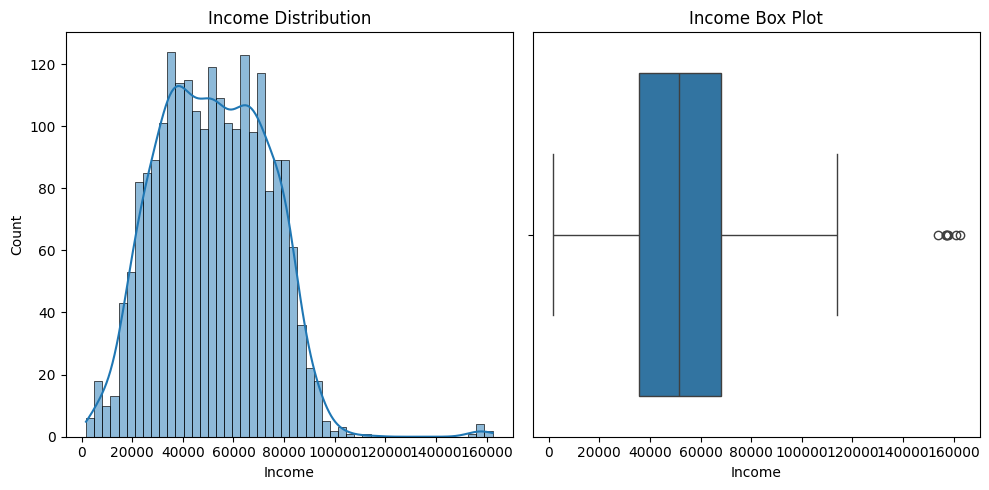

In [14]:
# Income Column

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram
sns.histplot(df['Income'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Income Distribution')

# Box plot
sns.boxplot(x=df['Income'], ax=axes[1])
axes[1].set_title('Income Box Plot')

plt.tight_layout()
plt.show()

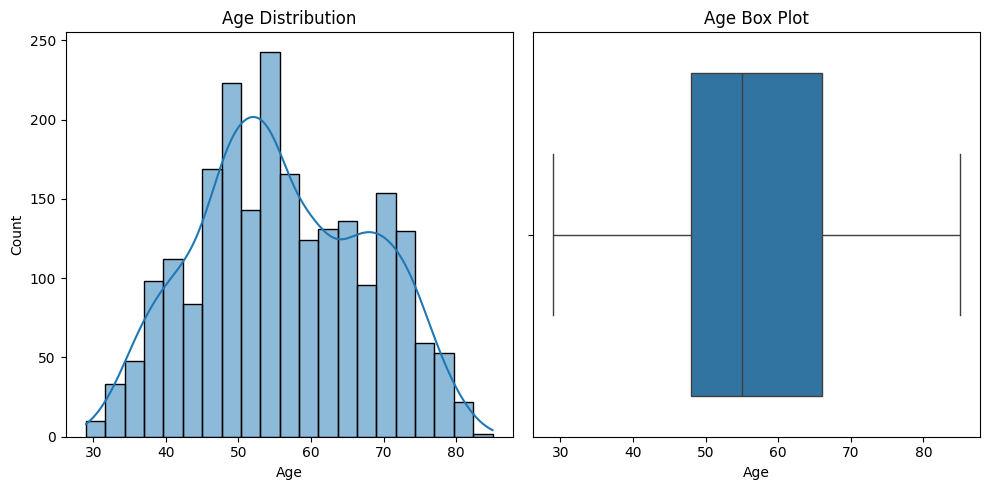

In [15]:
# Age Column

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Box plot
sns.boxplot(x=df['Age'], ax=axes[1])
axes[1].set_title('Age Box Plot')

plt.tight_layout()
plt.show()

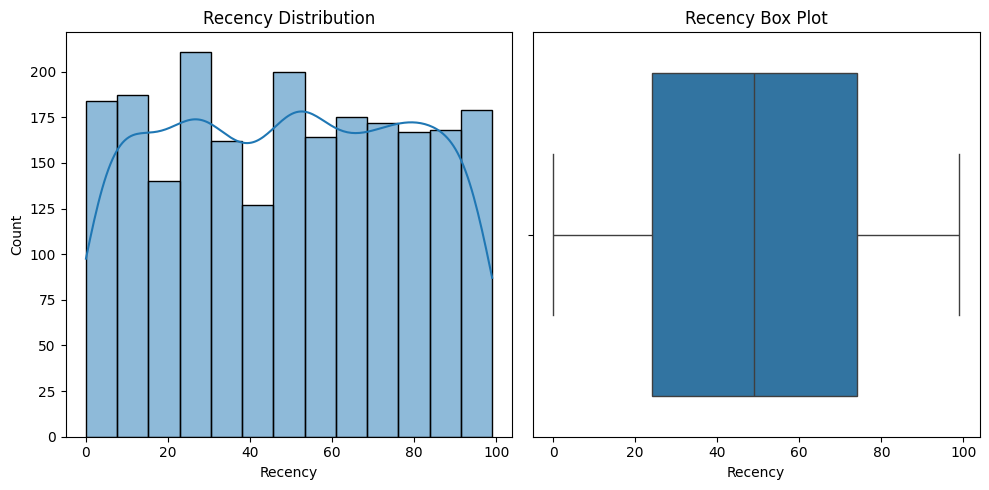

In [16]:
# Recency Column

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')

# Box plot
sns.boxplot(x=df['Recency'], ax=axes[1])
axes[1].set_title('Recency Box Plot')

plt.tight_layout()
plt.show()

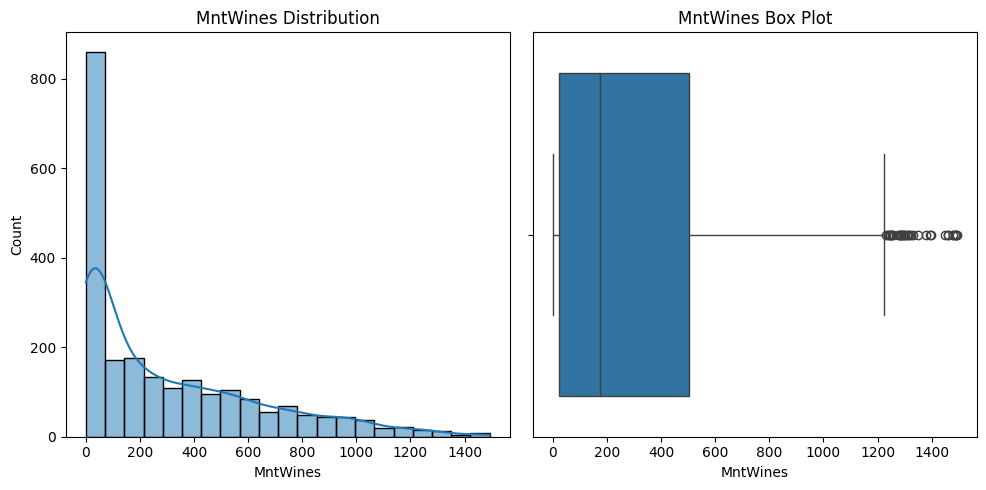

In [17]:
# MntWines

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['MntWines'], kde=True, ax=axes[0])
axes[0].set_title('MntWines Distribution')

# Box plot
sns.boxplot(x=df['MntWines'], ax=axes[1])
axes[1].set_title('MntWines Box Plot')

plt.tight_layout()
plt.show()

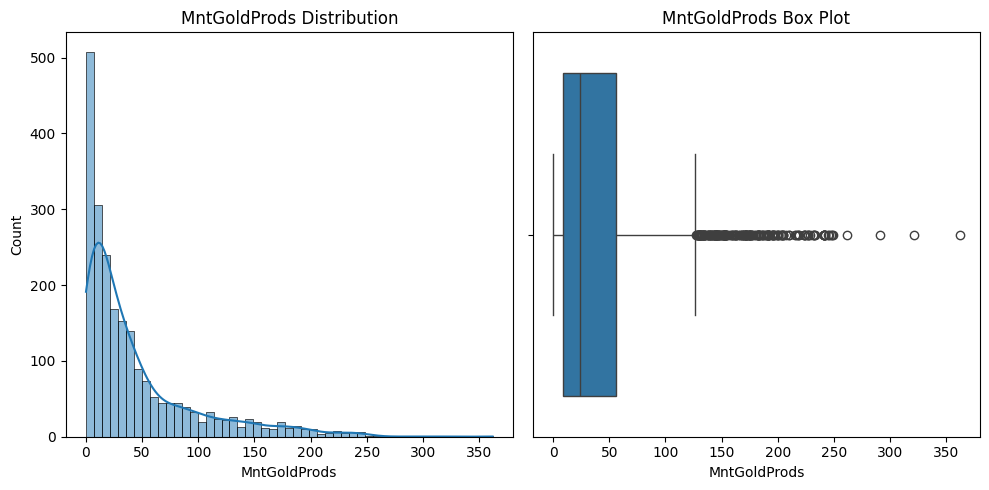

In [18]:
# MntGoldProds

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['MntGoldProds'], kde=True, ax=axes[0])
axes[0].set_title('MntGoldProds Distribution')

# Box plot
sns.boxplot(x=df['MntGoldProds'], ax=axes[1])
axes[1].set_title('MntGoldProds Box Plot')

plt.tight_layout()
plt.show()

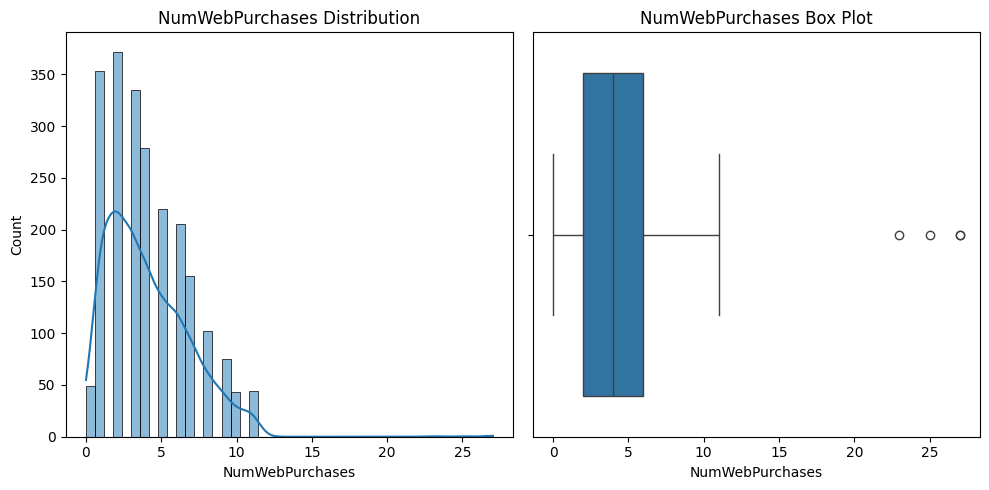

In [19]:
# NumWebPurchases

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['NumWebPurchases'], kde=True, ax=axes[0])
axes[0].set_title('NumWebPurchases Distribution')

# Box plot
sns.boxplot(x=df['NumWebPurchases'], ax=axes[1])
axes[1].set_title('NumWebPurchases Box Plot')

plt.tight_layout()
plt.show()

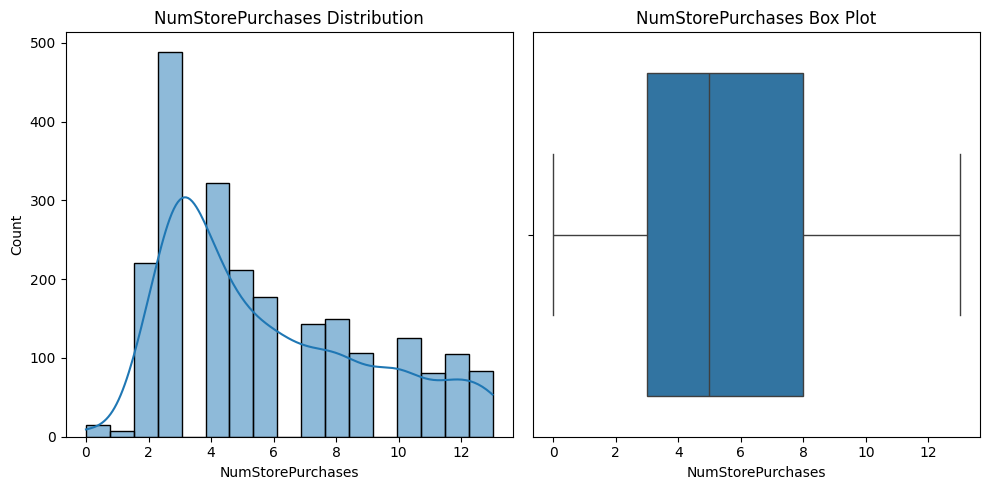

In [20]:
# NumStorePurchases

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Histogram
sns.histplot(df['NumStorePurchases'], kde=True, ax=axes[0])
axes[0].set_title('NumStorePurchases Distribution')

# Box plot
sns.boxplot(x=df['NumStorePurchases'], ax=axes[1])
axes[1].set_title('NumStorePurchases Box Plot')

plt.tight_layout()
plt.show()

#### B) Categorical Univariate

##### 🔸Non-visual

In [21]:
# Education Columns

# Frequency test
print("Count \n-------------------")
print(df['Education'].value_counts())

# Percentage distribution
print("\nPercentage \n-------------------")
print(df['Education'].value_counts(normalize=True) * 100)

# Number of unique categories
print(f"\nUnique categories : {df['Education'].nunique()}")

Count 
-------------------
Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

Percentage 
-------------------
Education
Graduation    50.357782
PhD           21.690519
Master        16.547406
2n Cycle       8.989267
Basic          2.415027
Name: proportion, dtype: float64

Unique categories : 5


In [22]:
# Marital_Status Column

# Frequency test
print("Count \n-------------------")
print(df['Marital_Status'].value_counts())

# Percentage distribution
print("\nPercentage \n-------------------")
print(df['Marital_Status'].value_counts(normalize=True) * 100)

# Number of unique categories
print(f"\nUnique categories : {df['Marital_Status'].nunique()}")

Count 
-------------------
Marital_Status
Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

Percentage 
-------------------
Marital_Status
Married     38.640429
Together    25.849732
Single      21.422182
Divorced    10.330948
Widow        3.443649
Alone        0.134168
YOLO         0.089445
Absurd       0.089445
Name: proportion, dtype: float64

Unique categories : 8


In [23]:
# Country

# Frequency test
print("Count \n-------------------")
print(df['Country'].value_counts())

# Percentage distribution
print("\nPercentage \n-------------------")
print(df['Country'].value_counts(normalize=True) * 100)

# Number of unique categories
print(f"\nUnique categories : {df['Country'].nunique()}")

Count 
-------------------
Country
Spain           1094
Saudi Arabia     335
Canada           268
Australia        160
India            147
Germany          120
USA              109
Mexico             3
Name: count, dtype: int64

Percentage 
-------------------
Country
Spain           48.926655
Saudi Arabia    14.982111
Canada          11.985689
Australia        7.155635
India            6.574240
Germany          5.366726
USA              4.874776
Mexico           0.134168
Name: proportion, dtype: float64

Unique categories : 8


##### 🔸Visual

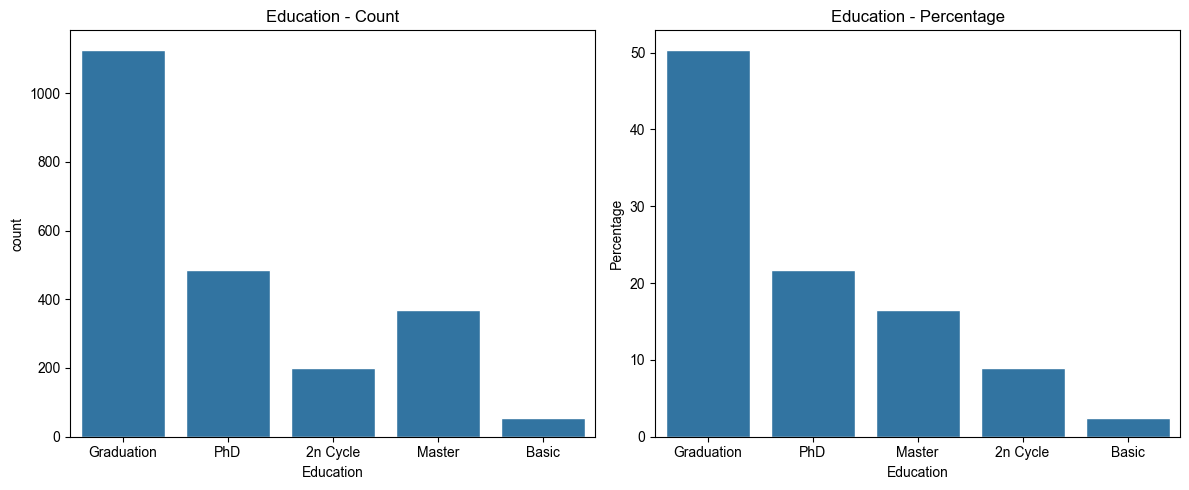

In [24]:
# Education Column

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Count plot
sns.countplot(x='Education', data=df, ax=axes[0])
axes[0].set_title('Education - Count')

# Percentage plot
edu_perc = df['Education'].value_counts(normalize=True) * 100

sns.barplot(
    x=edu_perc.index,
    y=edu_perc.values,
    ax=axes[1]
)
axes[1].set_title('Education - Percentage')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()


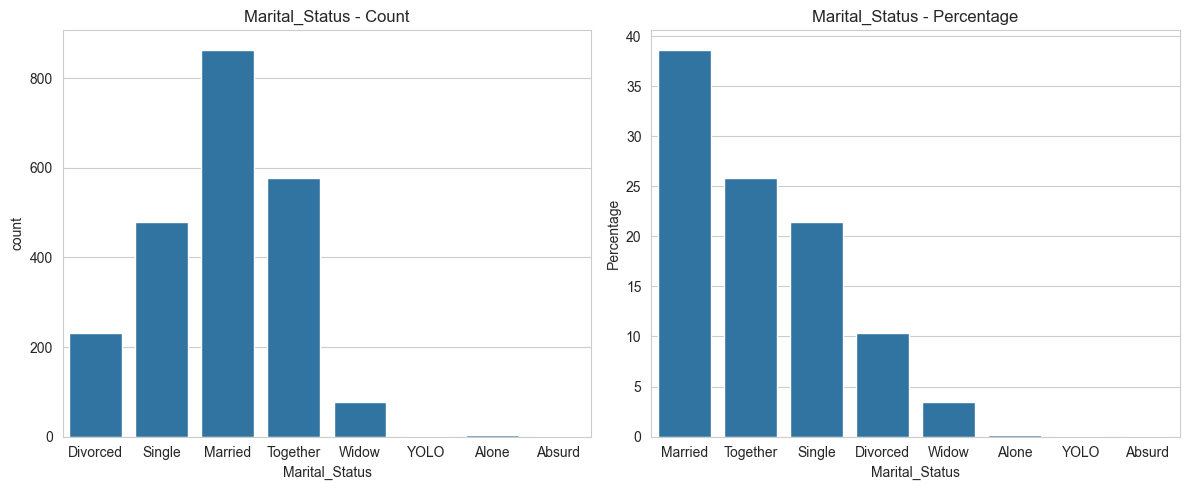

In [25]:
# Marital_Status

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Count plot
sns.countplot(x='Marital_Status', data=df, ax=axes[0])
axes[0].set_title('Marital_Status - Count')

# Percentage plot
ms_perc = df['Marital_Status'].value_counts(normalize=True) * 100

sns.barplot(
    x=ms_perc.index,
    y=ms_perc.values,
    ax=axes[1]
)
axes[1].set_title('Marital_Status - Percentage')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

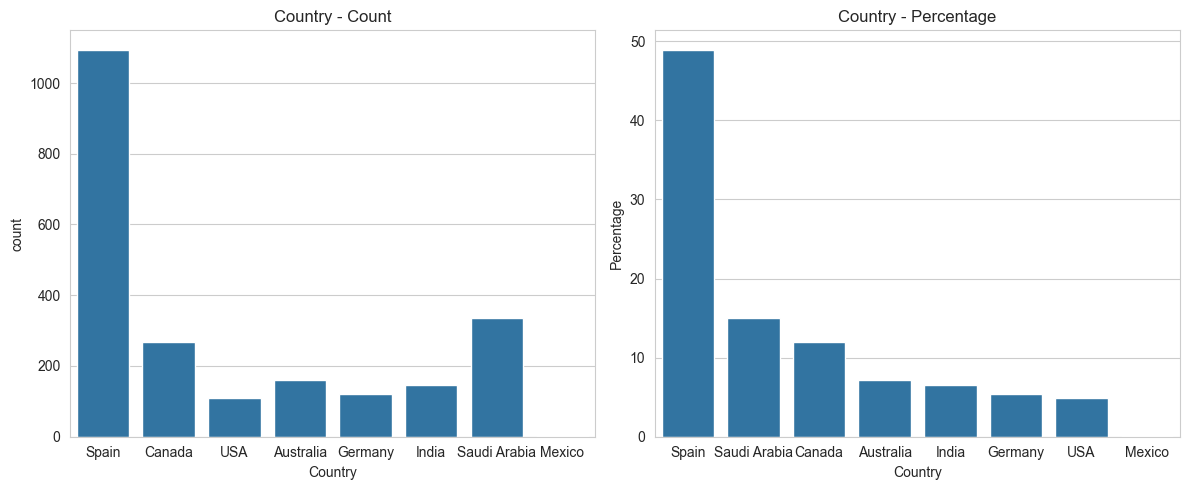

In [26]:
# Country

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Count plot
sns.countplot(x='Country', data=df, ax=axes[0])
axes[0].set_title('Country - Count')

# Percentage plot
con_perc = df['Country'].value_counts(normalize=True) * 100

sns.barplot(
    x=con_perc.index,
    y=con_perc.values,
    ax=axes[1]
)
axes[1].set_title('Country - Percentage')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

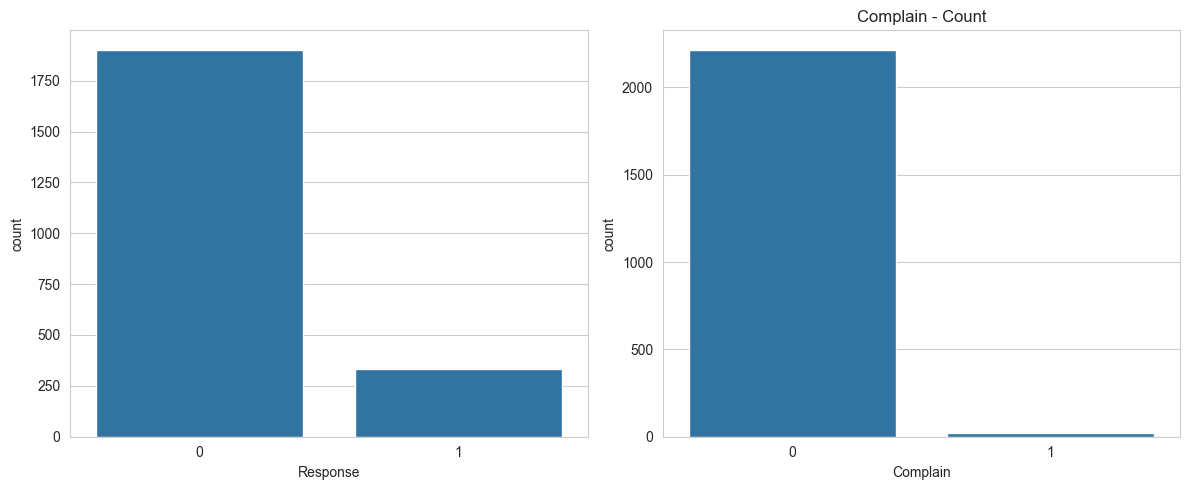

In [27]:
# Response and Complain Columns (Binary data column)

fig, axes = plt.subplots(1,2,figsize=(12,5))

# Response Count
sns.countplot(x='Response', data=df, ax=axes[0])
axes[1].set_title('Response - Count')

# Complain Count
sns.countplot(x='Complain', data=df, ax=axes[1])
axes[1].set_title('Complain - Count')

plt.tight_layout()
plt.show()


### 2. BIVARIATE ANALYSIS (Two columns together)

#### A) Numerical vs Numerical

##### 🔸Non-Visual

In [ ]:
# Correlation between meaningful columns

# Income Vs Age

df[['Income', 'Age']].corr()

# very small positive relationship between Income & Age

,Income,Age
Income,1.000000,0.198835
Age,0.198835,1.000000


In [ ]:
# Recency vs NumWebPurchases

df[['Recency', 'NumWebPurchases']].corr()

# almost no relationship between Recency & NumWebPurchases

,Recency,NumWebPurchases
Recency,1.000000,-0.010776
NumWebPurchases,-0.010776,1.000000


In [ ]:
# Income vs MntGoldProds

df[['Income', 'MntGoldProds']].corr()

# not so strong but still some positive relationship between Income & MntGoldProds

,Income,MntGoldProds
Income,1.000000,0.383548
MntGoldProds,0.383548,1.000000


##### 🔸Visual

<Axes: xlabel='Income', ylabel='Age'>

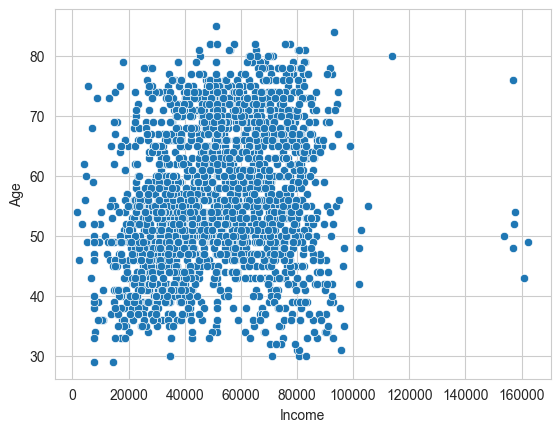

In [31]:
# Scatter plot of meaningful Columns

# Income vs Age

sns.scatterplot(x='Income', y='Age', data=df)

<Axes: xlabel='Recency', ylabel='NumWebPurchases'>

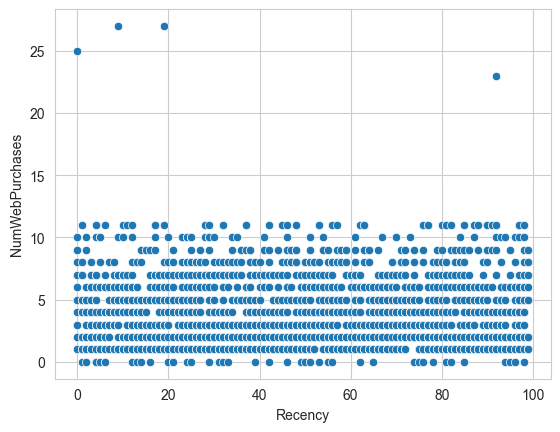

In [ ]:
# Recency vs NumWebPurchases

sns.scatterplot(x='Recency', y='NumWebPurchases', data=df)

# alsmost no relationship or pattern in plot

<Axes: xlabel='Income', ylabel='MntGoldProds'>

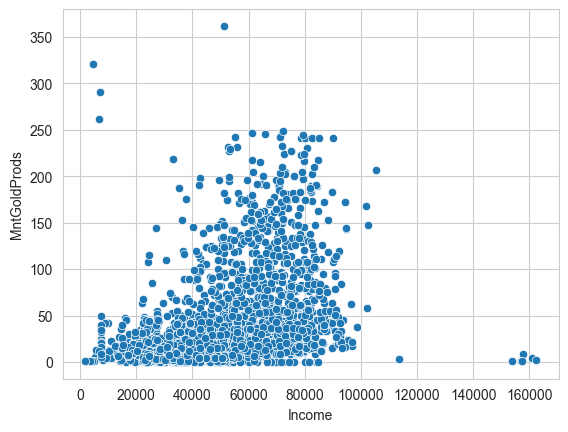

In [ ]:
# Income vs MntGoldProds

sns.scatterplot(x='Income', y='MntGoldProds', data=df)


# a small positive relationship

#### B) Numerical vs Categorical

##### 🔸Non-Visual

In [ ]:
# Education Vs Income

df.groupby('Education')['Income'].mean().reset_index(name='Income Mean')

# higher educated people have high mean income

,Education,Income Mean
0,2n Cycle,47681.395522
1,Basic,20306.259259
2,Graduation,52162.049290
3,Master,52896.777027
4,PhD,56039.735052


In [ ]:
# Education Vs MntWines

df.groupby('Education')['MntWines'].mean().reset_index(name='MntWines Mean')

# higher educated people consume more wines

,Education,MntWines Mean
0,2n Cycle,200.039801
1,Basic,7.240741
2,Graduation,284.513321
3,Master,333.075676
4,PhD,403.773196


In [ ]:
# Country Vs NumWebPurchases

df.groupby('Country')['NumWebPurchases'].mean().reset_index(name='NumWebPurchases Mean')

# web purchase is almost same in every given country

,Country,NumWebPurchases Mean
0,Australia,4.087500
1,Canada,4.305970
2,Germany,3.975000
3,India,3.959184
4,Mexico,6.000000
5,Saudi Arabia,4.158209
6,Spain,4.001828
7,USA,4.440367


##### 🔸Visual

<Axes: xlabel='Education', ylabel='Income'>

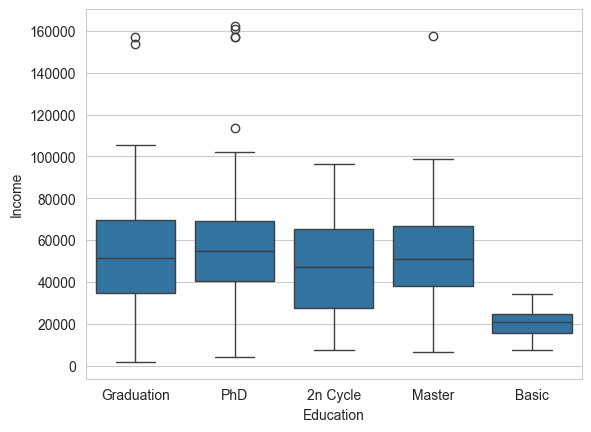

In [37]:
# Education Vs Income

sns.boxplot(x='Education', y='Income', data=df)

<Axes: xlabel='Education', ylabel='MntWines'>

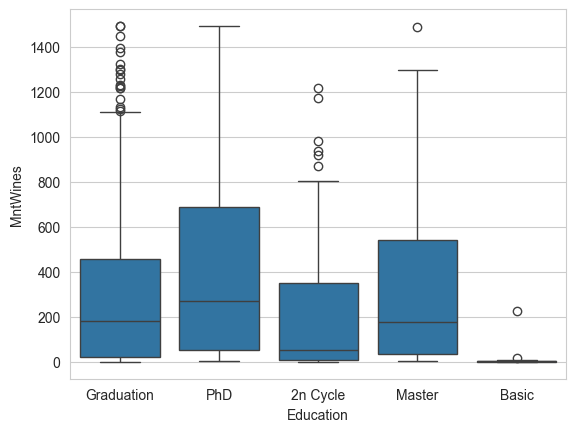

In [ ]:
# Education Vs MntWines

sns.boxplot(x='Education', y='MntWines', data=df)

# higher educated people consume more wines

<Axes: xlabel='Country', ylabel='NumWebPurchases'>

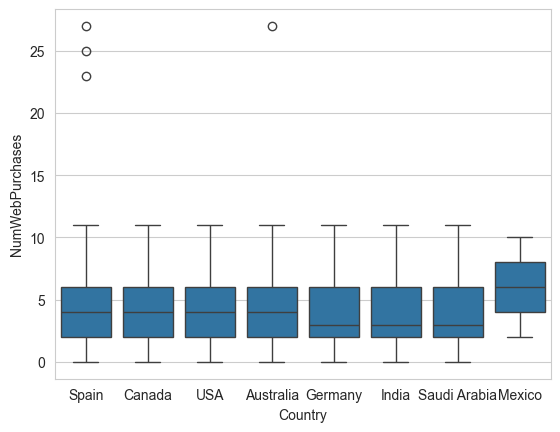

In [ ]:
# Country Vs NumWebPurchases

sns.boxplot(x='Country', y='NumWebPurchases', data=df)

# not much difference in web purchase between countries

<Axes: xlabel='Response', ylabel='Income'>

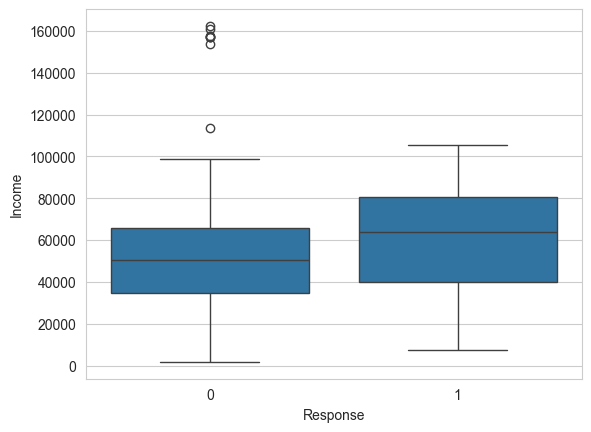

In [ ]:
# Response Vs Income

# Response is considered as categorical column (because binary data)

sns.boxplot(x='Response', y='Income', data=df)

# people who have higher mean income given more response than the others

#### C) Categorical vs Categorical

##### 🔸Non-Visual

In [ ]:
# Education vs Response (Crosstab with Percentage)

pd.crosstab(
    df['Education'],
    df['Response'],
    normalize='index'
) * 100

# highly educated peoples given more response than others

Response,0,1
Education,,
2n Cycle,89.054726,10.945274
Basic,96.296296,3.703704
Graduation,86.500888,13.499112
Master,84.594595,15.405405
PhD,79.175258,20.824742


In [ ]:
# Marital_Status vs Response (Crosstab with Percentage)

pd.crosstab(
  df['Marital_Status'], 
  df['Response'],
  normalize="index"
) * 100

# people who have marital_status as single or widow given more response than others

Response,0,1
Marital_Status,,
Absurd,50.000000,50.000000
Alone,66.666667,33.333333
Divorced,79.220779,20.779221
Married,88.657407,11.342593
Single,77.870564,22.129436
Together,89.619377,10.380623
Widow,75.324675,24.675325
YOLO,50.000000,50.000000


In [ ]:
# Country vs Response (Crosstab with Percentage)

pd.crosstab(
  df['Country'], 
  df['Response'],
  normalize= "index"
) * 100

# response is not highly affected by different countries

Response,0,1
Country,,
Australia,85.625000,14.375000
Canada,85.820896,14.179104
Germany,85.833333,14.166667
India,91.156463,8.843537
Mexico,33.333333,66.666667
Saudi Arabia,84.477612,15.522388
Spain,83.912249,16.087751
USA,88.073394,11.926606


##### 🔸Visual

<Axes: xlabel='Response', ylabel='Education'>

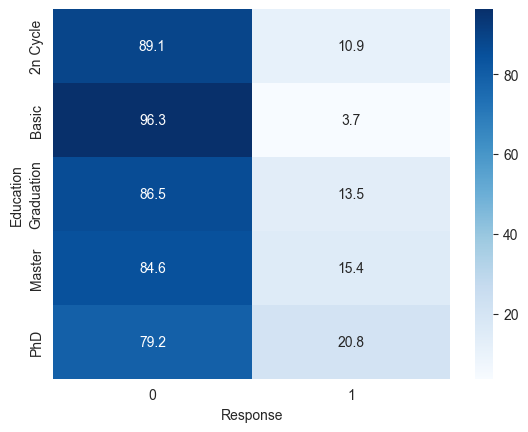

In [44]:
# Heatmap

# Education Vs Response
sns.heatmap(
    pd.crosstab(df['Education'], df['Response'], normalize='index') * 100,
    annot=True,
    fmt='.1f',
    cmap='Blues'
)


<Axes: xlabel='Response', ylabel='Marital_Status'>

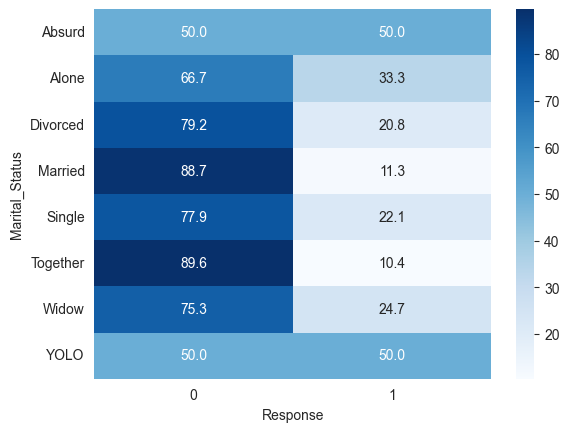

In [45]:
# Marital_Status vs Response

sns.heatmap(
  pd.crosstab(df['Marital_Status'], df['Response'], normalize='index') * 100,
  annot=True,
  fmt='.1f',
  cmap='Blues'
)

<Axes: xlabel='Response', ylabel='Country'>

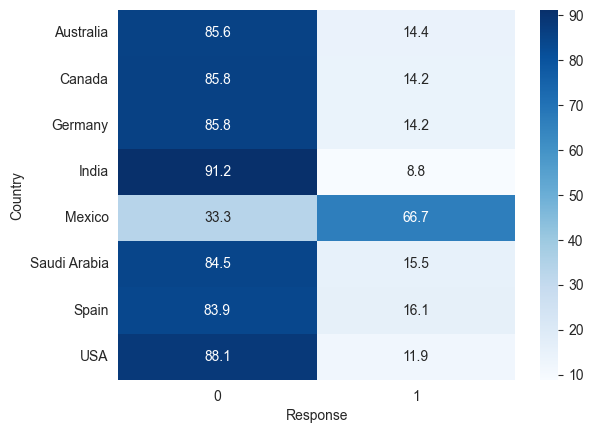

In [46]:
# Country vs Response (Crosstab with Percentage)

sns.heatmap(
  pd.crosstab(df['Country'], df['Response'], normalize="index") * 100,
  annot=True,
  fmt='.1f',
  cmap='Blues'
)

### 2. FINEL INSIGHTS

- very small positive relationship between Income & Age
- almost no relationship between Recency & NumWebPurchases
- not so strong but still some positive relationship between Income & MntGoldProds

- higher educated people have high mean income
- higher educated people consume more wines
- web purchase is almost same in every given country
- people who have higher income given more response than the people with average income
- highly educated peoples given more response than people with basic education
- people who have marital_status as single or widow given more response
- response is not highly affected by different countries